# Binary Classification

- Email Dataset

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

## Step 2: Load and Explore the Dataset

In [3]:
dataset = pd.read_csv(r'C:\Users\dell\Downloads\archive (1)\emails.csv')

In [4]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
dataset.shape

(5728, 2)

## Step 3: Data Preprocessing

In [6]:
print(dataset.duplicated().sum())

33


In [7]:
df = dataset.drop_duplicates()

In [8]:
df.shape

(5695, 2)

In [9]:
X = df['text']
y = df['spam']

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(4556, 37303)
(1139, 37303)


## Step 4: Model Training and Evaluation

In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [16]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.98      0.97      0.97       296

    accuracy                           0.99      1139
   macro avg       0.98      0.98      0.98      1139
weighted avg       0.99      0.99      0.99      1139



## Step 5: Visualization

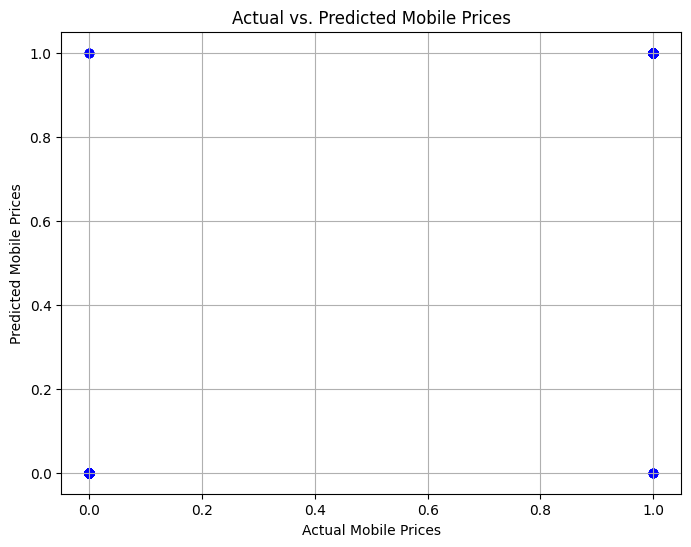

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Mobile Prices')
plt.ylabel('Predicted Mobile Prices')
plt.title('Actual vs. Predicted Mobile Prices')
plt.grid(True)
plt.show()

## Step 6 : Check Prediction

In [18]:
new_text_data = ["Reminder: BIA® DoubtBuster Session Today"]
X_new = vectorizer.transform(new_text_data)
predictions = model.predict(X_new)

if (predictions[0]==1):
  print('spam mail')

else:
  print('not spam')

not spam
